In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn = sqlite3.connect('dinofunworld.db')
cur = conn.cursor()

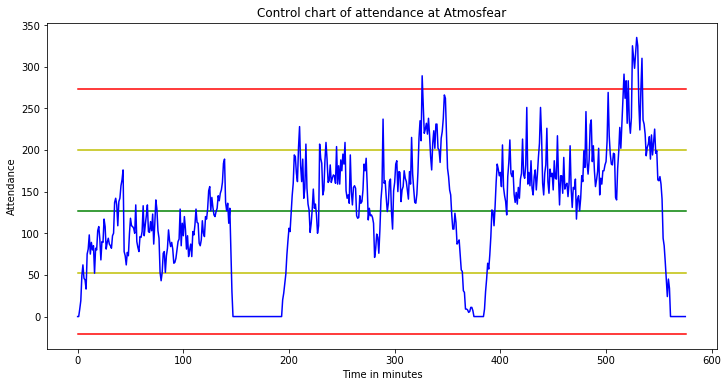

In [2]:
#Answer 1:
time_interval = 5
attractionID = pd.read_sql("SELECT attractionId FROM attraction WHERE attraction.Name = 'Atmosfear';",conn)['AttractionID'][0]
new_df = pd.read_sql("SELECT visitorID AS visitor, sequence FROM sequences WHERE sequence LIKE '%" + str(attractionID) + "%';",conn)
new_df['seq_list'] = new_df['sequence'] \
.apply(lambda sequence: [1 if visit == str(attractionID) else 0 for visit in sequence.split("-")])
visitor_attendance = np.sum(new_df['seq_list'].values.tolist(), axis=0)
visitors_list = range(0, len(visitor_attendance)*time_interval, time_interval)
mean_value = np.nanmean(visitor_attendance)
std_value = np.nanstd(visitor_attendance)
list_data = []
for i in range(len(visitors_list)):
    list_data.append(visitor_attendance[i])
plt.figure(figsize=(12,6))
plt.plot([0,len(visitors_list)], [mean_value,mean_value], 'g-')
plt.plot([0,len(visitors_list)], [mean_value+std_value,mean_value+std_value], 'y-')
plt.plot([0,len(visitors_list)], [mean_value-std_value,mean_value-std_value], 'y-')
plt.plot([0,len(visitors_list)], [mean_value+2*std_value,mean_value+2*std_value], 'r-')
plt.plot([0,len(visitors_list)], [mean_value-2*std_value,mean_value-2*std_value], 'r-')
plt.plot(range(len(visitors_list)), visitor_attendance, 'b-')
plt.ylabel('Attendance')
plt.xlabel('Time in minutes')
plt.title('Control chart fro attendance at Atmosfear')
plt.show()

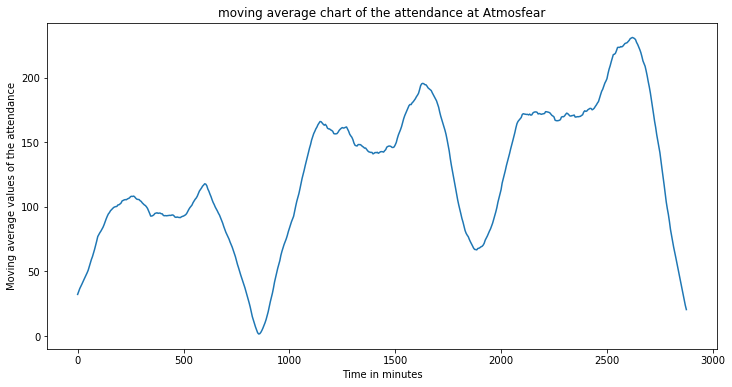

In [3]:
#Answer2:
window_size = 50
moving_avg_list = np.convolve(visitor_attendance, np.ones(window_size,)/window_size, 'same')
plt.figure(figsize=(12,6))
plt.plot(visitors_list,moving_avg_list)
plt.ylabel('Moving average values of the attendance')
plt.xlabel('Time in minutes')
plt.title('moving average chart of the attendance at Atmosfear')
plt.show()

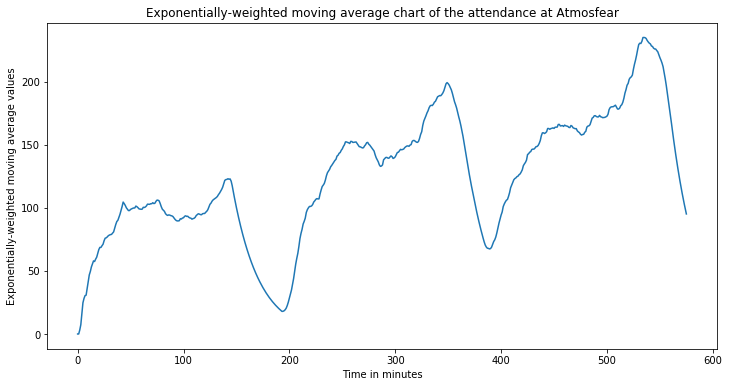

In [4]:
#Answer3:
visitors_attendance_df = pd.DataFrame(visitor_attendance)
visitors_attendance_df_exp = visitors_attendance_df.ewm(span=50).mean()
plt.figure(figsize=(12,6))
plt.plot(visitors_attendance_df_exp)
plt.ylabel('Exponentially-weighted moving average values')
plt.xlabel('Time in minutes')
plt.title('Exponentially-weighted moving average chart of the attendance at Atmosfear')
plt.show()